# Unoptimized vs. optimized hyperparameters
We will analyze the effect of optimizing the hyperparameters of the RF model. For this, we will compare the average MAE of the baseline model for unoptimized and optimized hyperparameters. In both case, we will use all the four metadata features and binary encoded genetic difference.

**Note**: Run this notebook after running notebooks "SuppFig3a_optimize_metadata" and "SuppFig3c_optimize_hyperparam_mut_mat" as this notebook uses their results.

## Imports and configuration for plotting

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities   # self defined functions
%matplotlib inline

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Paths and filenames

In [2]:
path_result = "../results/SuppFig3_optimization_RFmodel/"   # results will be saved in this directory
Path(path_result).mkdir(parents=True, exist_ok=True)   # make directory if it does not exist already

fig_fn = path_result + 'SuppFig3b_unoptimized_optimized_hyperparam.svg'

## Read validation scores and prepare data for plots
Read validation scores of the model for both unoptimized and optimized hyperparameters.

In [4]:
scores       = pd.read_csv("../results/SuppFig3_optimization_RFmodel/SuppFig3a_optimize_metadata_validScores.csv")
scores_optim = pd.read_csv("../results/SuppFig3_optimization_RFmodel/SuppFig3c_optimize_mut_mat_hyperopt.csv")

scores = scores[(scores.metadata=='a+p+vPC+sPC') &
                (scores.season=='Average')][['mut_mat', 'MAE']]
scores.rename(columns={'mut_mat': 'Hyperparams'},
              inplace=True)
scores['Hyperparams'] = 'Unoptimized'

scores.loc[1, 'Hyperparams'] = 'Optimized'
scores.loc[1, 'MAE']         = scores_optim[scores_optim.mut_mat=='binary']['mae'].values

del scores_optim

## Plot average MAE for unoptimized and optimized hyperparameters

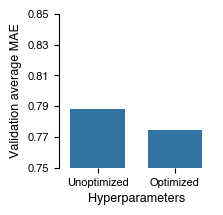

In [5]:
fig, ax = plt.subplots(figsize=(2,2))

plot = sns.barplot(x='Hyperparams', y='MAE', data=scores,
                   color='C0', ax=ax)

utilities.change_seaborn_width(ax, 0.7)

# configurations for figure
ax.set_ylim(bottom=0.75, top=0.85)
ax.set_yticks(np.arange(0.75,0.86,0.02))
ax.set_xlabel("Hyperparameters", fontsize=9)
ax.set_ylabel("Validation average MAE", fontsize=9)

sns.despine(trim=True, bottom=True)

# save figure
fig.savefig(fig_fn, format='svg', bbox_inches='tight')